# Step 1: Data Acquisition

The NLTK library is utilized to fetch the movie reviews dataset. The dataset comprises positive and negative movie reviews, sourced from the NLTK's movie_reviews corpus.

In [1]:
import nltk
from nltk.corpus import movie_reviews

#download movie_reviews from nldk
#nltk.download('movie_reviews')

# Access movie reviews
reviews = [(list(movie_reviews.words(fileid)), category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]



# Step 2: Data Processing and Cleaning

The NLTK library is again utilized to preprocess the data. This involves removing stop words, stemming, and converting words to lowercase, making the text data suitable for analysis.


In [2]:
import nltk

#download stopwords
#nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Preprocess the data
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def process_text(text):
    words = [ps.stem(word.lower()) for word in text if word.isalpha() and word.lower() not in stop_words]
    return words

# Apply processing to all reviews
processed_reviews = [(process_text(words), category) for words, category in reviews]


# Step 3: Sentiment Analysis Implementation

For sentiment analysis, a machine learning approach is employed using scikit-learn. A Multinomial Naive Bayes classifier is trained on a combination of positive and negative movie reviews. The accuracy of the classifier is evaluated on a test set. Additionally, the project incorporates a rule-based sentiment analysis approach using the SentimentIntensityAnalyzer from NLTK, which calculates sentiment scores using the VADER lexicon.

In [3]:
from nltk import download, corpus
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


# Load positive and negative reviews
positive_reviews = [(corpus.movie_reviews.raw(fileid), 'pos') for fileid in corpus.movie_reviews.fileids('pos')]
negative_reviews = [(corpus.movie_reviews.raw(fileid), 'neg') for fileid in corpus.movie_reviews.fileids('neg')]

# Combine positive and negative reviews
reviews = positive_reviews + negative_reviews


# Split the data into training and testing sets
train_reviews, test_reviews = train_test_split(reviews, test_size=0.2, random_state=42)

# Vectorize the reviews using CountVectorizer
vectorizer = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)
X_train = vectorizer.fit_transform([review for review, _ in train_reviews])
X_test = vectorizer.transform([review for review, _ in test_reviews])


# Labels
y_train = [label for _, label in train_reviews]
y_test = [label for _, label in test_reviews]

# Train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict sentiments on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy
accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy on the movie_reviews dataset: {accuracy_score}")

# Create a SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Create an empty list to store data
data = []

# Add reviews, actual labels, and predicted labels to the list
for i, (review, actual_label) in enumerate(test_reviews):
    # Vectorize the review
    review_vectorized = vectorizer.transform([review])

    # Predict sentiment using MultinomialNB
    predicted_label = classifier.predict(review_vectorized)[0]

    # Get the sentiment scores using VADER
    sentiment_scores = sid.polarity_scores(review)

    # Add the data to the list
    data.append({
        'Review': review,
        'Actual Sentiment': actual_label,
        'Predicted Sentiment': predicted_label,
        'Compound Score': sentiment_scores['compound'],
        'Positive Score': sentiment_scores['pos'],
        'Neutral Score': sentiment_scores['neu'],
        'Negative Score': sentiment_scores['neg']
    })

# Create a DataFrame from the list
reviews_df = pd.DataFrame(data)

# Display the DataFrame
print(reviews_df)
 


Accuracy on the movie_reviews dataset: 0.8075
                                                Review Actual Sentiment  \
0    i guess that if a very wild bachelor party had...              neg   
1    with the abundance of trite , recycled movies ...              pos   
2    as a hot-shot defense attorney , kevin lomax (...              neg   
3    hedwig ( john cameron mitchell ) was born a bo...              pos   
4    i've heard it called " jaws with claws " and t...              neg   
..                                                 ...              ...   
395  in many ways , " twotg " does for tough-guy mo...              pos   
396  if only austin powers : the spy who shagged me...              neg   
397  when a film is produced on a shoestring budget...              neg   
398  titanic is so close to being the perfect movie...              pos   
399  it's a curious thing - i've found that when wi...              pos   

    Predicted Sentiment  Compound Score  Positive Sco

# Step 4: Results Visualization

The results of sentiment analysis are visualized using the matplotlib library. A pie chart is created to illustrate the distribution of positive and negative sentiments in the test set.

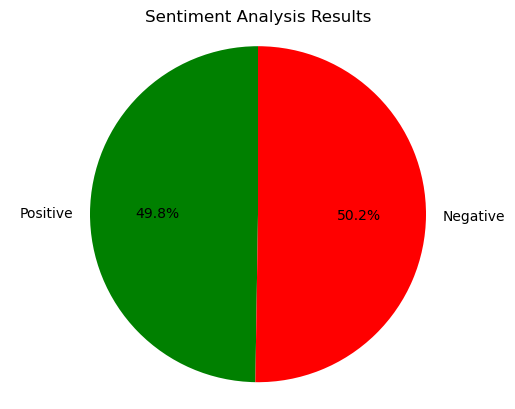

In [5]:
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative']
sizes = [
    len(reviews_df[reviews_df['Actual Sentiment'] == 'pos']),
    len(reviews_df[reviews_df['Actual Sentiment'] == 'neg']),
   
]


colors = ['green', 'red']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Sentiment Analysis Results')
plt.show()


In summary, this project integrates NLTK for text processing, scikit-learn for machine learning, and matplotlib for visualization to create a comprehensive sentiment analysis pipeline for movie reviews. The combination of these technologies allows for a thorough exploration of both rule-based and machine learning-based approaches in sentiment analysis.